In [1]:
import cv2, numpy as np
from matplotlib import pyplot as plt

im = cv2.imread("./triangle.png")
template = im[:50,:50]

def display(m: cv2.typing.MatLike, f: plt) -> None:
    f.imshow(cv2.cvtColor(m, cv2.COLOR_BGR2RGB))
    f.axis('off')
    f.show()

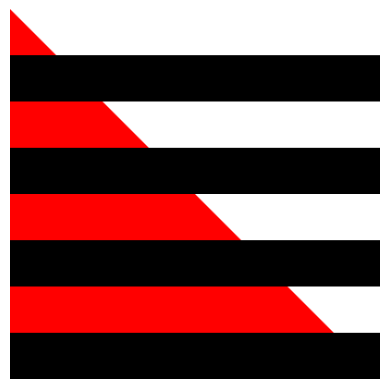

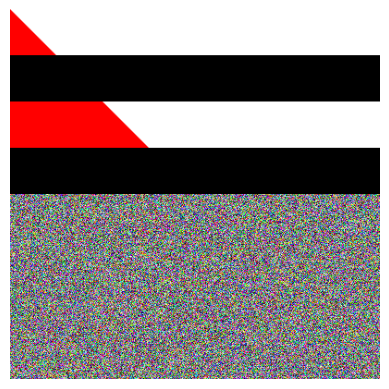

In [2]:
display(im, plt)
im2 = np.random.randint(0, 255, size=im.shape, dtype=im.dtype)
x0,y0,x1,y1 = 0, 0, 400, 200
im2[y0:y1, x0:x1] = im[y0:y1, x0:x1]
display(im2, plt)
im = im2

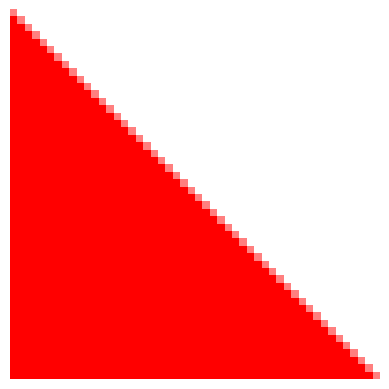

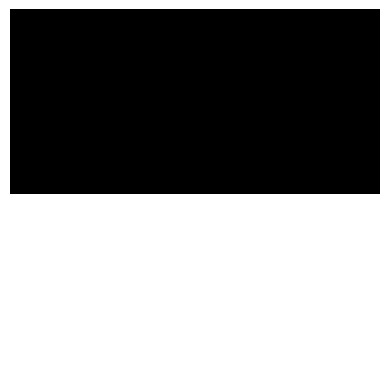

[(np.int64(0), np.int64(0)), (np.int64(0), np.int64(1)), (np.int64(0), np.int64(2)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(1), np.int64(2)), (np.int64(2), np.int64(2)), (np.int64(75), np.int64(73)), (np.int64(75), np.int64(74)), (np.int64(75), np.int64(75))]


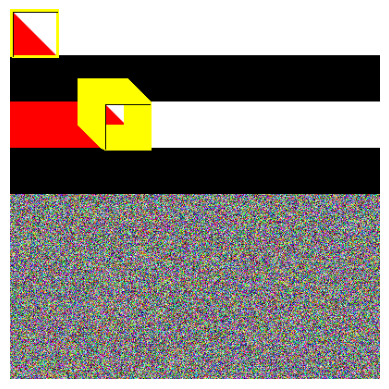

In [3]:
# im[:100,:] = 0
# im[:100,:,1:] = 255
baseimg = im.copy()
h, w = template.shape[:-1]

display(template, plt)
#mask = template.copy(
mask = np.zeros(template.shape, dtype=template.dtype)
mask[:] = 255
mask[:h//2] = 0
# mask[h//2:] = 0
display(mask, plt)

res = cv2.matchTemplate(im, template, cv2.TM_CCOEFF_NORMED, mask=mask)
# mask results in nans and infs https://github.com/opencv/opencv/issues/23257
res[res == float('nan')] = 0
res[res == float('inf')] = 0

threshold = 0.9
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(baseimg, (pt[0]+1,pt[1]+1), (pt[0] + w, pt[1] + h), (0,0,0), 1)
    cv2.rectangle(baseimg, pt, (pt[0] + w, pt[1] + h), (0,255,255), 1)
print(list(zip(*loc))[:10])

display(baseimg, plt)

1.0


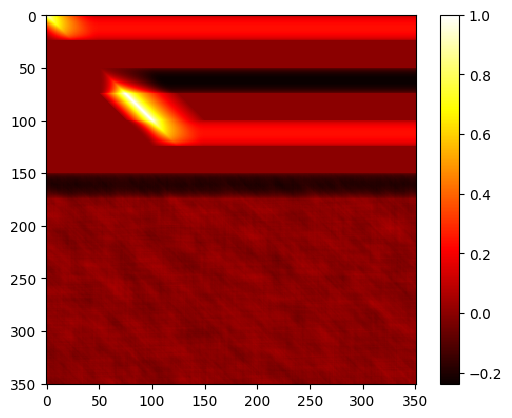

In [4]:
a = res.copy()
# a[a < 0] = 0
# a[a > 0.8] = 2
a[np.isnan(a)] = 0
a[np.isinf(a)] = 0
print(np.max(a))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

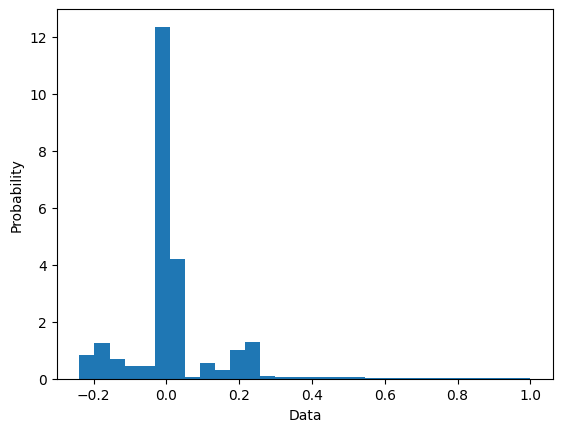

In [5]:
plt.hist(res[(res >= -1) & (res <= 1)].flat, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(75, 75) 1.0
(0, 0) 0.9999999


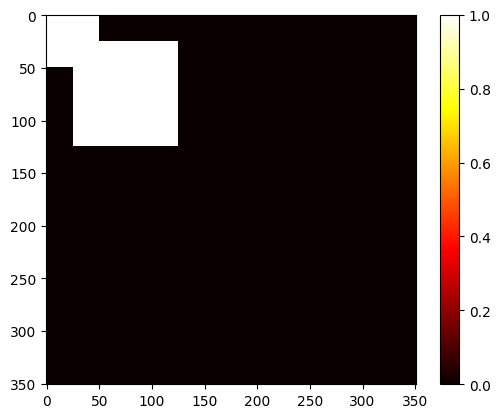

In [6]:
from math import isnan
padding = 50
a = res.copy()
z = a.copy()
z[:,:] = 0
print(z)
# print(list(np.ndenumerate(a))[:5])
a[np.isinf(a)] = 0
a[np.isnan(a)] = 0
b = sorted(np.ndenumerate(a), key=lambda x:x[1], reverse=True)
for coord, x in b:
    if isnan(x): continue
    if x < 0.9: continue
    i, j = coord
    n, m = a.shape
    if z[i][j]: continue
    li, ri = max(0, i-padding+1), min(n, i+padding-1)
    lj, rj = max(0, j-padding+1), min(m, j+padding-1)
    z[li:ri+1,lj:rj+1] = 1
    # z[i:i+5,j:j+5] = 10
    print(coord, x)

plt.imshow(z, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()